
## PyTorch Essentials

-----
### Day 5: Advanced Features and Production Workflows
### Advanced Features
 - RNNs, LSTM, Attention Mechanims
 - Diffusion Models
 - Transformers
 - GANs
 - Hugging Face Transformers

#### Production Workflows
 -  TorchScript for Deployment
 -  ONNX Export
 -  Model Quantization and Pruning
 -  Memory and Layout Optimizations
 -  Serving with FastAPI
#### Cutting-Edge Techniques
 - Distributed Training (DDP)
 - Mixed Precision Training (AMP)
 - Mobile Deployment Workflow

---

### Recurrent Neural Networks (RNNs)


#### The Core Idea: Memory for Networks

At its heart, a **Recurrent Neural Network (RNN)** is a type of artificial neural network designed to recognize patterns in **sequences of data**, such as time series, speech, text, financial data, audio, video, and more.

What makes RNNs unique is their built-in **"memory."** They can use information from previous steps in the sequence to inform the current step. Traditional neural networks (like CNNs for images) assume all inputs are independent of each other. For a sequence like a sentence, this is a terrible assumption—the meaning of a word depends entirely on the words that came before it.

An RNN addresses this by having a **loop** that allows information to persist.

---



#### The Analogy: Reading a Book

Think about reading a book:
*   You don't read each word in isolation and forget the previous ones.
*   You understand each word based on your understanding of all the words you've just read. Your memory of the context is crucial.

An RNN works similarly. As it processes each piece of the sequence (each word in a sentence, each day's stock price), it updates an internal "state" or "memory" that contains a summary of what it has seen so far. This state is passed along to the next step.

---

#### How It Works: The Recurrent Loop

The key to an RNN is its recurrent cell. Let's break down the famous "unrolled" diagram:

1.  **The Input:** At a given time step `t`, the network receives an input `x_t` (e.g., one word in a sentence).
2.  **The Hidden State:** This is the network's "memory." It is computed based on:
    *   The current input `x_t`
    *   The previous hidden state `h_{t-1}`
3.  **The Output:** The network produces an output `y_t` (e.g., a prediction of the next word), which is often based on the newly updated hidden state `h_t`.

The magic is in the formula that calculates the new hidden state:
`h_t = activation_function( W_x * x_t + W_h * h_{t-1} + bias )`

*   `W_x` is a weight matrix for the input.
*   `W_h` is a weight matrix for the previous hidden state.
*   The same function and the same weights (`W_x` and `W_h`) are **reused at every time step**. This is called **parameter sharing** and is a fundamental feature of RNNs, making them efficient and able to handle sequences of any length.

This process creates a chain-like structure, where information from the beginning of the sequence can, in theory, influence the output at the end.

![Recurrent Neural Networks](./recurrent_neural_network.webp)
*A simple RNN cell "unrolled" over time. The same cell (with the same weights) processes each input, passing its hidden state forward.*

---



### Common Applications of RNNs

RNNs are powerful tools for any task where context and order matter.

1.  **Natural Language Processing (NLP):**
    *   **Language Modeling & Text Generation:** Predicting the next most likely word in a sentence.
    *   **Machine Translation:** Translating a sentence from one language to another (e.g., Google Translate originally used RNNs).
    *   **Speech Recognition:** Transcribing audio to text.
    *   **Sentiment Analysis:** Determining if a product review is positive or negative.

2.  **Time Series Prediction:**
    *   **Stock Market Forecasting:** Predicting future stock prices based on historical data.
    *   **Weather Forecasting:** Predicting temperature or rainfall.

3.  **Other Sequential Data:**
    *   **Video Captioning:** Generating a description of what's happening in a video frame-by-frame.
    *   **Music Generation:** Composing music note-by-note.

---

### The Problem: Vanishing and Exploding Gradients

A major challenge with simple ("vanilla") RNNs is that they struggle to learn **long-range dependencies**. It's very difficult for them to connect information from many steps ago to the present.

For example, consider the sentence: "The clouds, dark and heavy, which had been gathering all afternoon high in the sky, finally began to..."

To predict the word "...rain", the network needs to connect the subject "clouds" from the very beginning of the sentence. A simple RNN often fails at this.

This happens due to the **vanishing/exploding gradient problem**. During training, the gradients (values used to update the weights) are multiplied many times over as they are passed back through the sequence. This causes them to shrink exponentially to zero (vanish) or grow exponentially large (explode), making the network unable to learn connections over long distances.

### The Solution: Advanced RNN Architectures (LSTM & GRU)

To solve this problem, more sophisticated RNN cells were invented. The two most important ones are:

*   **LSTM (Long Short-Term Memory):** This is the most famous variant. LSTMs have a more complex structure with a "cell state" that acts like a conveyor belt, running through the entire chain. It has special gates (input, forget, and output gates) that carefully regulate what information to keep, forget, and output. This allows them to preserve information for very long sequences.
*   **GRU (Gated Recurrent Unit):** A simpler and often faster variant of the LSTM. It combines the forget and input gates into a single "update gate" and merges the cell state and hidden state. It often performs on par with LSTM with less computational cost.

**In modern practice, when people say "RNN," they are often referring to these more advanced architectures (LSTM/GRU) rather than the simple vanilla RNN.**

![image](./rnn-lstm-gru-transformers.png)



---

### Summary

| Feature | Description |
| :--- | :--- |
| **Core Purpose** | To process **sequential data** by using an internal memory. |
| **Key Mechanism** | A **recurrent loop** that passes a **hidden state** from one time step to the next, using the **same weights** at each step. |
| **Strength** | Excels at tasks where the **order and context** of data points are critical. |
| **Weakness** | Simple RNNs suffer from the **vanishing gradient problem**, making them bad at long sequences. |
| **Modern Use** | **LSTM** and **GRU** networks are the standard due to their ability to handle long-range dependencies effectively. |

In short, an RNN is a **neural network with a feedback loop that gives it a memory**, making it the go-to architecture for analyzing and generating sequential data.

#### Basic RNN Implementation in PyTorch

In [1]:
import torch
import torch.nn as nn

# Define a simple RNN cell for one-step processing
class SimpleRNNCell(nn.Module):
  def __init__(self, input_size, hidden_size):
     super(SimpleRNNCell, self).__init__()
     self.hidden_size = hidden_size
 
     # Combined weights for input and hidden state
     self.ih = nn.Linear(input_size, hidden_size)
     self.hh = nn.Linear(hidden_size, hidden_size)
 
  def forward(self, x, h_prev):
     # x: input at current timestep [batch, input_size]
     # h_prev: hidden state from previous timestep [batch, hidden_size]
 
     # Combine input and previous hidden state
     h_next = torch.tanh(self.ih(x) + self.hh(h_prev))
 
     return h_next

# Let's implement a basic RNN
class SimpleRNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
     super(SimpleRNN, self).__init__()
     self.hidden_size = hidden_size
     self.rnn_cell = SimpleRNNCell(input_size, hidden_size)
     self.fc = nn.Linear(hidden_size, output_size)
 
  def forward(self, x):
     # x: input sequence [batch, seq_len, input_size]
     batch_size = x.size(0)
     seq_len = x.size(1)
 
     # Initialize hidden state with zeros
     h = torch.zeros(batch_size, self.hidden_size, device=x.device)
 
     # Process each timestep
     for t in range(seq_len):
         h = self.rnn_cell(x[:, t, :], h)
 
     # Use the final hidden state for prediction
     output = self.fc(h)
     return output
  
  
# Test the SimpleRNN with a dummy input
input_size = 10
hidden_size = 20
output_size = 5

rnn = SimpleRNN(input_size, hidden_size, output_size)

# Create a dummy input sequence
# Shape: [batch_size, seq_len, input_size]
dummy_input = torch.randn(4, 7, input_size)

# Forward pass through the RNN
output = rnn(dummy_input)
print("RNN output shape:", output.shape)
print(output)

RNN output shape: torch.Size([4, 5])
tensor([[ 0.4514, -0.7566, -0.0792, -0.3037,  0.1719],
        [ 0.2743,  0.1450, -0.1450,  0.5052,  0.0213],
        [ 0.0139,  0.1746, -0.1276,  0.3445, -0.0764],
        [ 0.2838, -0.0643, -0.1849,  0.3965,  0.2386]],
       grad_fn=<AddmmBackward0>)


#### Using PyTorch's Built-in RNN Modules

In [ ]:
import torch
import torch.nn as nn

# A complete example using PyTorch's RNN module
class RNNModel(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
     super(RNNModel, self).__init__()
 
     # RNN layer
     self.rnn = nn.RNN(
                    input_size=input_size,
                    hidden_size=hidden_size,
                    num_layers=num_layers,
                    batch_first=True,
                    dropout=dropout if num_layers > 1 else 0
     )
 
     # Output layer
     self.fc = nn.Linear(hidden_size, output_size)
 
  def forward(self, x):
     # x shape: [batch, seq_len, input_size]
 
     # Initialize hidden state h_0 (default is all zeros)
     # h_0 shape: [num_layers, batch, hidden_size]
     batch_size = x.size(0)
     h_0 = torch.zeros(self.rnn.num_layers, batch_size, 
     self.rnn.hidden_size, device=x.device)
 
     # Forward propagate through RNN
     # out shape: [batch, seq_len, hidden_size]
     # h_n shape: [num_layers, batch, hidden_size]
     out, h_n = self.rnn(x, h_0)
 
     # Use output from the last time step for classification
     # We need the last time step's output for each batch item
     out = self.fc(out[:, -1, :])
 
     return out

#### LSTM Implementation in PyTorch

In [ ]:
class LSTMModel(nn.Module):
 def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
    super(LSTMModel, self).__init__()
 
    # LSTM layer
    self.lstm = nn.LSTM(
                  input_size=input_size,
                  hidden_size=hidden_size,
                  num_layers=num_layers,
                  batch_first=True,
                  dropout=dropout if num_layers > 1 else 0
    )
 
    # Output layer
    self.fc = nn.Linear(hidden_size, output_size)
 
 def forward(self, x):
    # x shape: [batch, seq_len, input_size]
 
    # Initialize hidden state h_0 and cell state c_0
    # h_0, c_0 shape: [num_layers, batch, hidden_size]
    batch_size = x.size(0)
    h_0 = torch.zeros(self.lstm.num_layers, batch_size, 
    self.lstm.hidden_size, device=x.device)
    c_0 = torch.zeros(self.lstm.num_layers, batch_size, 
    self.lstm.hidden_size, device=x.device)
 
    # Forward propagate through LSTM
    # out shape: [batch, seq_len, hidden_size]
    # (h_n, c_n) shape: ([num_layers, batch, hidden_size], [num_layers, batch, hidden_size])
    out, (h_n, c_n) = self.lstm(x, (h_0, c_0))
 
    # Use output from the last time step
    out = self.fc(out[:, -1, :])
 
    return out
# Example usage
input_size = 10
hidden_size = 20
num_layers = 2
output_size = 5

lstm_model = LSTMModel(input_size, hidden_size, num_layers, output_size)

# Create a dummy input sequence
# Shape: [batch_size, seq_len, input_size]
dummy_input = torch.randn(4, 7, input_size)

# Forward pass through the LSTM
output = lstm_model(dummy_input)
print("LSTM output shape:", output.shape)
print(output)

LSTM output shape: torch.Size([4, 5])
tensor([[-0.0339,  0.1261, -0.0385,  0.0348, -0.1405],
        [-0.0264,  0.1270, -0.0520,  0.0359, -0.1642],
        [-0.0101,  0.1206, -0.0099,  0.0550, -0.1278],
        [-0.0282,  0.1125, -0.0506,  0.0299, -0.1242]],
       grad_fn=<AddmmBackward0>)


#### Bi-directional LSTM using PyTorch

In [ ]:
class BiLSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size, 
              num_layers, output_size, dropout=0.2):
     super(BiLSTMModel, self).__init__()
 
     # Bi-directional LSTM
     self.lstm = nn.LSTM(
                  input_size=input_size,
                  hidden_size=hidden_size,
                  num_layers=num_layers,
                  batch_first=True,
                  bidirectional=True, # Enable bidirectional processing
                  dropout=dropout if num_layers > 1 else 0
     )
 
     # Output layer (note: 2*hidden_size because bidirectional)
     self.fc = nn.Linear(hidden_size * 2, output_size)
 
  def forward(self, x):
     # Initial hidden & cell states
     h_0 = torch.zeros(self.lstm.num_layers * 2, x.size(0), 
     self.lstm.hidden_size, device=x.device) # *2 for bidirectional
     c_0 = torch.zeros(self.lstm.num_layers * 2, x.size(0), 
     self.lstm.hidden_size, device=x.device)
 
     # Forward pass
     out, _ = self.lstm(x, (h_0, c_0))
 
     # Use output from the last time step
     out = self.fc(out[:, -1, :])
 
     return out

#### Exercise: Text Classification with LSTM

In [ ]:
# Build a sentiment analysis model using an LSTM network
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

# TODO: Create a custom dataset class for text classification
class TextClassificationDataset(Dataset):
   def __init__(self, texts, labels, vocab, max_length=100):
       # Initialize the tokenizer
       self.tokenizer = get_tokenizer('basic_english')
       self.vocab = vocab
       self.max_length = max_length
 
       # TODO: Process texts and labels
       # self.processed_texts = ...
       # self.labels = ...
 
   def __len__(self):
       # TODO: Return the size of the dataset
       pass
 
   def __getitem__(self, idx):
       # TODO: Return the processed text and label at index idx
       pass

# TODO: Create the model
class LSTMClassifier(nn.Module):
   def __init__(self, vocab_size, embedding_dim, hidden_dim, 
                output_dim, n_layers, dropout, bidirectional):
       # TODO: Implement the model
       pass
 
   def forward(self, text):
       # TODO: Implement the forward pass
       pass

#### Text Classification Solution

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator



class TextClassificationDataset(Dataset):
  def __init__(self, texts, labels, vocab, max_length=100):
     self.tokenizer = get_tokenizer('basic_english')
     self.vocab = vocab
     self.max_length = max_length
 
     # Process texts - convert tokens to indices
     self.processed_texts = []
     for text in texts:
         tokens = self.tokenizer(text)
         # Convert tokens to indices and pad/truncate to max_length
         indices = [vocab[token] for token in tokens]
         if len(indices) < max_length:
            indices += [vocab['']] * (max_length - len(indices))
         else:
            indices = indices[:max_length]
         self.processed_texts.append(indices)
 
     # Convert to tensors
     self.processed_texts = torch.tensor(self.processed_texts, dtype=torch.long)
     self.labels = torch.tensor(labels, dtype=torch.long)
 
  def __len__(self):
     return len(self.labels)
 
  def __getitem__(self, idx):
     return self.processed_texts[idx], self.labels[idx]

class LSTMClassifier(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim,
               output_dim, n_layers, dropout, bidirectional):
     super(LSTMClassifier, self).__init__()
 
     # Embedding layer
     self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
 
     # LSTM layer
     self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                         dropout=dropout, batch_first=True, 
                         bidirectional=bidirectional)
 
     # Linear layer
     self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
 
     # Dropout layer
     self.dropout = nn.Dropout(dropout)
 
  def forward(self, text):
     # text shape: [batch size, sequence length]
 
     # Embed the text
     embedded = self.embedding(text)
     # embedded shape: [batch size, sequence length, embedding dim]
 
     # Pass through LSTM
     output, (hidden, cell) = self.lstm(embedded)
     # If bidirectional, concatenate the final forward and backward hidden states
     if self.lstm.bidirectional:
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
     else:
        hidden = hidden[-1,:,:]
 
     # Apply dropout
     hidden = self.dropout(hidden)
 
     # Pass through linear layer
     output = self.fc(hidden)
 
     return output
  
# Example implementation of training function
def train_model(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    best_val_loss = float('inf')
 
    for epoch in range(epochs):
       # Training
       model.train()
       train_loss = 0
       train_acc = 0
 
       for texts, labels in train_loader:
           texts, labels = texts.to(device), labels.to(device)
 
           # Forward pass
           optimizer.zero_grad()
           predictions = model(texts)
 
           # Calculate loss
           loss = criterion(predictions, labels)
 
           # Backward pass
           loss.backward()
 
           # Update parameters
           optimizer.step()
 
           # Calculate accuracy
           predictions = torch.argmax(predictions, dim=1)
           train_acc += torch.sum(predictions == labels).item() / len(labels)
           train_loss += loss.item()
 
           train_loss = train_loss / len(train_loader)
           train_acc = train_acc / len(train_loader)
 
       # Validation
       model.eval()
       val_loss = 0
       val_acc = 0
 
       with torch.no_grad():
          for texts, labels in val_loader:
              texts, labels = texts.to(device), labels.to(device)
 
              # Forward pass
              predictions = model(texts)
 
              # Calculate loss
              loss = criterion(predictions, labels)
 
              # Calculate accuracy
              predictions = torch.argmax(predictions, dim=1)
              val_acc += torch.sum(predictions == labels).item() / len(labels)
              val_loss += loss.item()
 
              val_loss = val_loss / len(val_loader)
              val_acc = val_acc / len(val_loader)
 
    print(f'Epoch: {epoch+1}')
    print(f'Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'Val Loss: {val_loss:.3f} | Val Acc: {val_acc*100:.2f}%')
 
    # Save the best model
    if val_loss < best_val_loss:
       best_val_loss = val_loss
       torch.save(model.state_dict(), 'best-lstm-model.pt')
       print('Model saved!')

# Example usage
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

# Create the model
model = LSTMClassifier(
    vocab_size=len(vocab),
    embedding_dim=100,
    hidden_dim=256,
    output_dim=len(set(labels)),
    n_layers=2,
    dropout=0.5,
    bidirectional=True
).to(device)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train the model
train_model(model, train_loader, val_loader, optimizer, criterion, epochs=10, device=device)

NameError: name 'vocab' is not defined

#### Character-Level Text Generation with LSTM

In [ ]:
import torch
import torch.nn as nn
import numpy as np

# Character-level LSTM for text generation
class CharLSTM(nn.Module):
   def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
      super(CharLSTM, self).__init__()
 
      self.hidden_size = hidden_size
      self.num_layers = num_layers
 
      # Character embedding layer
      self.embedding = nn.Embedding(input_size, hidden_size)
 
      # LSTM layer
      self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, 
                          batch_first=True, dropout=dropout)
 
      # Fully connected output layer
      self.fc = nn.Linear(hidden_size, output_size)
 
   def forward(self, x, hidden=None):
      # If no hidden state is provided, initialize with zeros
      batch_size = x.size(0)
      if hidden is None:
          h_0 = torch.zeros(self.num_layers, batch_size, 
                            self.hidden_size, device=x.device)
          c_0 = torch.zeros(self.num_layers, batch_size, 
                            self.hidden_size, device=x.device)
          hidden = (h_0, c_0)
 
      # Embed characters
      embedded = self.embedding(x)
 
      # Pass through LSTM
      output, hidden = self.lstm(embedded, hidden)
 
      # Reshape output for the fully connected layer
      output = output.reshape(-1, self.hidden_size)
      output = self.fc(output)
 
      # Reshape back to batch size and sequence length
      output = output.view(batch_size, -1, output.size(1))
 
      return output, hidden
# Example usage
vocab_size = 100
model = CharLSTM(input_size=vocab_size, hidden_size=256, num_layers=2, output_size=vocab_size)


#### Text Generation with LSTM

In [ ]:
# Function to generate text using a trained character-level LSTM
def generate_text(model, char_to_idx, idx_to_char, seed_text, next_chars=100, temperature=1.0):
   model.eval()
 
   # Convert seed text to tensor
   chars = [char_to_idx[c] for c in seed_text]
   input_tensor = torch.tensor([chars], dtype=torch.long).to(next(model.parameters()).device)
 
   # Initial hidden state
   hidden = None
 
   # Generate characters
   generated_text = seed_text
 
   with torch.no_grad():
      for _ in range(next_chars):
         # Forward pass
         output, hidden = model(input_tensor, hidden)
 
         # Get the next character probabilities (last time step)
         output = output[:, -1, :] / temperature
 
         # Convert to probabilities
         probabilities = torch.softmax(output, dim=1)
 
         # Sample from the distribution
         probabilities = probabilities.cpu().numpy()[0]
         next_char_idx = np.random.choice(len(probabilities), p=probabilities)
 
         # Convert to character
         next_char = idx_to_char[next_char_idx]
         generated_text += next_char
 
         # Update input tensor for next iteration
         input_tensor = torch.tensor([[next_char_idx]],
                dtype=torch.long).to(next(model.parameters()).device)
 
   return generated_text

# Example usage:
# model = CharLSTM(input_size=len(char_to_idx), hidden_size=128, num_layers=2, output_size=len(char_to_idx))
# model.load_state_dict(torch.load('char_lstm_model.pt'))
# print(generate_text(model, char_to_idx, idx_to_char, "Once upon a time", next_chars=200))

### Generative AI models

Generative AI models can take inputs such as text, image, audio, video, and code and generate new content into any of the modalities mentioned. For example, it can turn text inputs into an image, turn an image into a song, or turn video into text.

**GANs**

Generative Adversarial Networks (GANs) are a type of deep learning architecture that use two neural networks – a generator and a discriminator – to generate new data that resembles a given training dataset. The generator creates new data samples, while the discriminator tries to distinguish between real and generated data. This adversarial process forces the generator to produce increasingly realistic data, eventually fooling the discriminator. 


**Diffusion Models**

Diffusion models are a type of generative AI model that creates new data, like images or audio, by gradually adding noise to existing data and then learning to reverse that process. They work by learning to remove the added noise, transforming it back into a structured output. This process is often used to generate high-quality, realistic images from text prompts.

![image](./diffusion2.png)


**AutoRegressive Models**

Autoregressive models (AR models) are a concept in time series analysis and forecasting that captures the relationship between an observation and several lagged observations i.e previous time steps. Its idea is that the current value of a time series data can be expressed as a linear combination of its past values with some random noise.

**Variational Autoencoders**

A Variational Autoencoder (VAE) is a type of generative model that combines elements of autoencoders and probabilistic modeling. It's used for tasks like generating new data samples that resemble the training data and for unsupervised learning. VAEs learn the underlying probability distribution of the input data. 

**Flow model**

A flow-based generative model is a generative model used in machine learning that explicitly models a probability distribution by leveraging normalizing flow,[1][2][3] which is a statistical method using the change-of-variable law of probabilities to transform a simple distribution into a complex one.


**Transformers**

The Transformer architecture is a neural network design, particularly well-suited for Natural Language Processing (NLP) tasks like translation and text generation, that uses self-attention to process input sequences. It leverages an encoder-decoder structure, with each component utilizing self-attention and feedforward neural networks to handle sequential data efficiently.

### Overview on Transformer Architecture

A transformer model is a neural network that learns the context of sequential data and generates new data out of it. Transformers are a current state-of-the-art NLP model and are considered the evolution of the encoder-decoder architecture. However, while the encoder-decoder architecture relies mainly on Recurrent Neural Networks (RNNs) to extract sequential information, Transformers completely lack this recurrency.

They are specifically designed to comprehend context and meaning by analyzing the relationship between different elements, and they rely almost entirely on a mathematical technique called attention to do so. The first Transformer model was explained in the influential paper **["Attention is All You Need"](https://arxiv.org/abs/1706.03762)**.

Transformer Models can be trained to perform:
  - Natural Language Processing:
    - Human Language Text Translation (Machine translation)
    - Large text summarization
    - Next word sequence prediction
    - Sentiment Analysis
    - Question and Answer (AI Chatbots and Virtual assistants)
    - Text Inferencing and Generation (Story telling, Poetry, etc...)
    - Named Entity Recognition (NER)
    - Search Engines
  - Computer Vision
    - Image Classification
    - Object Detection
    - Image Segmentation
    - Image Generation
  - Speech Processing
    - Speech Recognition
    - Speech Synthesis
    - Voice Assistants
  - Agentic AI
    - Code Completion and Debugging
    - Art & Design (UI mockups, AI-generated art and music, animation scripting)
    - Infrasture Automation (in progress...)
    - Game Playing
    - Autonomous Driving (in progress...)
    - Robotics (in progress...)
  
Transformers are the core engine of various Large Language Models: ChatGPT, LLama, Claude, Gemma (Gemini), Grok, deepSeek and more...

##### Transformer Architecture 

![image](./Transformer_Architecture.png)

---

![image](./Self_Attention.png)

An intuitive video on YouTube by 3Blue1Brown about Transformers: [Transformers (how LLMs work) explained visually](https://www.youtube.com/watch?v=wjZofJX0v4M&vl=en)

In [ ]:
a = "Python's capability for ML is awesome"
tokens = ["Python", "'s", "capability", "for", "ML", "is", "awesome"]

### Attention Mechanism

#### Self-Attention Mechanism Implementation

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SelfAttention(nn.Module):
   def __init__(self, embed_size):
       super(SelfAttention, self).__init__()
 
       # Linear projections for Query, Key, Value
       self.query = nn.Linear(embed_size, embed_size)
       self.key = nn.Linear(embed_size, embed_size)
       self.value = nn.Linear(embed_size, embed_size)
 
       # Scaling factor
       self.scale = torch.sqrt(torch.FloatTensor([embed_size])).to(next(self.parameters()).device)
 
   def forward(self, x, mask=None):
       # x shape: [batch_size, seq_len, embed_size]
       batch_size = x.shape[0]
       seq_len = x.shape[1]
 
       # Create Query, Key, Value projections
       Q = self.query(x) # [batch_size, seq_len, embed_size]
       K = self.key(x) # [batch_size, seq_len, embed_size]
       V = self.value(x) # [batch_size, seq_len, embed_size]
 
       # Calculate attention scores
       # Q * K^T / sqrt(embed_size)
       energy = torch.matmul(Q, K.permute(0, 2, 1)) / self.scale # [batch_size, seq_len, seq_len]
 
       # Apply mask if provided (e.g., for padding)
       if mask is not None:
           energy = energy.masked_fill(mask == 0, -1e10)
 
       # Apply softmax to get attention weights
       attention = F.softmax(energy, dim=-1) # [batch_size, seq_len, seq_len]
 
       # Weight values by attention scores
       x = torch.matmul(attention, V) # [batch_size, seq_len, embed_size]
 
       return x, attention


#### Multi-Head Attention Implementation

In [ ]:
class MultiHeadAttention(nn.Module):
  def __init__(self, embed_size, num_heads, dropout=0.1):
     super(MultiHeadAttention, self).__init__()
 
     assert embed_size % num_heads == 0, "Embedding dimension must be divisible by number of heads"
 
     self.embed_size = embed_size
     self.num_heads = num_heads
     self.head_dim = embed_size // num_heads
 
     # Linear projections
     self.query = nn.Linear(embed_size, embed_size)
     self.key = nn.Linear(embed_size, embed_size)
     self.value = nn.Linear(embed_size, embed_size)
 
     # Output projection
     self.fc_out = nn.Linear(embed_size, embed_size)
 
     # Dropout
     self.dropout = nn.Dropout(dropout)
 
     # Scaling factor
     self.scale = torch.sqrt(torch.FloatTensor([self.head_dim]))
 
  def forward(self, query, key, value, mask=None):
     batch_size = query.shape[0]
 
     # Linear projections
     Q = self.query(query) # [batch_size, query_len, embed_size]
     K = self.key(key) # [batch_size, key_len, embed_size]
     V = self.value(value) # [batch_size, value_len, embed_size]
 
     # Reshape for multi-head attention
     Q = Q.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
     K = K.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
     V = V.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
     # Q, K, V shape: [batch_size, num_heads, seq_len, head_dim]
 
     # Scale and calculate attention
     energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale.to(Q.device)
     # energy shape: [batch_size, num_heads, query_len, key_len]
 
     # Apply mask if provided
     if mask is not None:
        energy = energy.masked_fill(mask == 0, -1e10)
 
     # Apply softmax to get attention weights
     attention = self.dropout(F.softmax(energy, dim=-1))
     # attention shape: [batch_size, num_heads, query_len, key_len]
 
     # Apply attention weights to values
     x = torch.matmul(attention, V)
     # x shape: [batch_size, num_heads, query_len, head_dim]
 
     # Reshape back to original dimension
     x = x.permute(0, 2, 1, 3).contiguous()
     # x shape: [batch_size, query_len, num_heads, head_dim]
     
     x = x.view(batch_size, -1, self.embed_size)
     # x shape: [batch_size, query_len, embed_size]
 
     # Apply final linear projection
     x = self.fc_out(x)
     # x shape: [batch_size, query_len, embed_size]
 
     return x, attention


#### Exercise: Building a Simple Transformer Block

In [ ]:
# Implement a basic transformer encoder block with multi-head attention and a feed-forward network.
import torch
import torch.nn as nn

# TODO: Complete the transformer encoder block implementation
class TransformerEncoderBlock(nn.Module):
   def __init__(self, embed_size, num_heads, ff_hidden_dim, dropout=0.1):
       super(TransformerEncoderBlock, self).__init__()
 
       # TODO: Add multi-head attention layer
 
       # TODO: Add layer normalization after attention
 
       # TODO: Add feed-forward network (FFN)
       # The FFN consists of two linear transformations with a ReLU in between
 
       # TODO: Add layer normalization after FFN
 
       # TODO: Add dropout layers
 
   def forward(self, x, mask=None):
       # TODO: Implement the forward pass with residual connections
       pass


#### Transformer Block Solution

In [ ]:
class TransformerEncoderBlock(nn.Module):
  def __init__(self, embed_size, num_heads, ff_hidden_dim, dropout=0.1):
     super(TransformerEncoderBlock, self).__init__()
 
     # Multi-head attention layer
     self.attention = MultiHeadAttention(embed_size, num_heads, dropout)
 
     # First normalization layer (after attention)
     self.norm1 = nn.LayerNorm(embed_size)
 
     # Feed-forward network
     self.feed_forward = nn.Sequential(
                              nn.Linear(embed_size, ff_hidden_dim),
                              nn.ReLU(),
                              nn.Dropout(dropout),
                              nn.Linear(ff_hidden_dim, embed_size)
     )
 
     # Second normalization layer (after FFN)
     self.norm2 = nn.LayerNorm(embed_size)
 
     # Dropout layers
     self.dropout = nn.Dropout(dropout)
 
  def forward(self, x, mask=None):
     # Self-attention with residual connection and normalization
     # Use x as query, key, and value
     attn_output, _ = self.attention(x, x, x, mask)
     x = self.norm1(x + self.dropout(attn_output))
 
     # Feed-forward network with residual connection and normalization
     ff_output = self.feed_forward(x)
     x = self.norm2(x + self.dropout(ff_output))
 
     return x


#### A Simple Transformer Encoder

In [ ]:
class TransformerEncoder(nn.Module):
  def __init__(self, vocab_size, embed_size, num_heads, 
               ff_hidden_dim, num_layers, max_seq_len, dropout=0.1):
 
     super(TransformerEncoder, self).__init__()
 
     # Token embedding layer
     self.token_embedding = nn.Embedding(vocab_size, embed_size)
 
     # Positional encoding layer
     self.positional_encoding = nn.Embedding(max_seq_len, embed_size)
 
     # Transformer encoder blocks
     self.layers = nn.ModuleList([
              TransformerEncoderBlock(embed_size, num_heads, ff_hidden_dim, dropout)
              for _ in range(num_layers)
     ])
 
     # Final layer normalization
     self.norm = nn.LayerNorm(embed_size)
 
     # Dropout
     self.dropout = nn.Dropout(dropout)
 
  def forward(self, x, mask=None):
     # x shape: [batch_size, seq_len]
 
     # Get sequence length
     seq_len = x.shape[1]
 
     # Create position indices
     positions = torch.arange(0, seq_len).unsqueeze(0).repeat(x.shape[0], 1).to(x.device)
 
     # Apply token and positional embeddings
     x = self.token_embedding(x) + self.positional_encoding(positions)
 
     # Apply dropout
     x = self.dropout(x)
 
     # Pass through all transformer encoder blocks
     for layer in self.layers:
         x = layer(x, mask)
 
     # Apply final layer normalization
     x = self.norm(x)
 
     return x


### Lab Project: Sentiment Analysis with Transfer Learning

In [ ]:
# This lab integrates several concepts we've learned:
# 1. Transfer learning with pre-trained embeddings
# 2. LSTM or Attention-based model for sequence processing
# 3. Training and evaluation

import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
import numpy as np
from torchtext.vocab import GloVe
from torch.utils.data import Dataset, DataLoader

# Prepare the dataset
class SentimentDataset(Dataset):
   def __init__(self, texts, labels, vocab, max_length=100):
      self.texts = texts
      self.labels = labels
      self.vocab = vocab
      self.max_length = max_length
 
   def __len__(self):
      return len(self.labels)
 
   def __getitem__(self, idx):
      text = self.texts[idx]
      label = self.labels[idx]
 
      # Convert words to indices using the vocabulary
      # and pad/truncate to max_length
      tokens = text.split()
      indices = [self.vocab.stoi.get(token, self.vocab.stoi['']) for token in tokens]
 
      if len(indices) < self.max_length:
         indices += [self.vocab.stoi['']] * (self.max_length - len(indices))
      else:
         indices = indices[:self.max_length]
 
      return torch.tensor(indices, dtype=torch.long), torch.tensor(label, dtype=torch.long)

# Define the LSTM with Attention model
class LSTMWithAttention(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, 
               n_layers, bidirectional, dropout, pad_idx, pretrained_embeddings=None):
     super(LSTMWithAttention, self).__init__()
 
     # Embedding layer - use pretrained if available
     self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
     if pretrained_embeddings is not None:
        self.embedding.weight.data.copy_(pretrained_embeddings)
        self.embedding.weight.requires_grad = False # Freeze embeddings
 
     # LSTM layer
     self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
     bidirectional=bidirectional, dropout=dropout, batch_first=True)
 
     # Self-attention layer
     self.attention = SelfAttention(hidden_dim * 2 if bidirectional else hidden_dim)
 
     # Linear layer
     self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
 
     # Dropout layer
     self.dropout = nn.Dropout(dropout)
 
  def forward(self, text):
     # text shape: [batch size, seq len]
 
     # Embed the text
     embedded = self.embedding(text)
     # embedded shape: [batch size, seq len, embedding dim]
 
     # Pass through LSTM
     outputs, (hidden, cell) = self.lstm(embedded)
     # outputs shape: [batch size, seq len, hidden dim * num directions]
 
     # Apply attention to the output states
     context, _ = self.attention(outputs)
 
     # Average the context vector along sequence length
     context = torch.mean(context, dim=1)
 
     # Apply dropout
     context = self.dropout(context)
 
     # Pass through linear layer
     output = self.fc(context)
 
     return output

# Define training function
def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
   best_val_acc = 0.0
 
   for epoch in range(epochs):
   # Training
   model.train()
   train_loss = 0
   train_correct = 0
   train_total = 0
 
   for batch_idx, (texts, labels) in enumerate(train_loader):
      texts, labels = texts.to(device), labels.to(device)
 
      # Forward pass
      optimizer.zero_grad()
      outputs = model(texts)
      loss = criterion(outputs, labels)
 
      # Backward pass
      loss.backward()
      optimizer.step()
 
      # Calculate accuracy
      _, predicted = outputs.max(1)
      train_total += labels.size(0)
      train_correct += predicted.eq(labels).sum().item()
      train_loss += loss.item()
 
      # Print progress
      if (batch_idx + 1) % 100 == 0:
         print(f'Epoch: {epoch+1}/{epochs}, Batch: {batch_idx+1}/{len(train_loader)}, ' +
               f'Loss: {train_loss/(batch_idx+1):.4f}, ' +
               f'Acc: {100.*train_correct/train_total:.2f}%')
 
   # Validation
   model.eval()
   val_loss = 0
   val_correct = 0
   val_total = 0
 
   with torch.no_grad():
      for texts, labels in val_loader:
          texts, labels = texts.to(device), labels.to(device)
          outputs = model(texts)
          loss = criterion(outputs, labels)
 
          # Calculate accuracy
          _, predicted = outputs.max(1)
          val_total += labels.size(0)
          val_correct += predicted.eq(labels).sum().item()
          val_loss += loss.item()
 
          val_acc = 100. * val_correct / val_total
          print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Acc: {val_acc:.2f}%')
 
          # Save best model
          if val_acc > best_val_acc:
             best_val_acc = val_acc
             torch.save(model.state_dict(), 'sentiment_model.pth')
             print(f'Model saved with validation accuracy: {best_val_acc:.2f}%')
 
   return model

# Load pretrained GloVe embeddings
# glove = GloVe(name='6B', dim=100)
# Load model and train
# model = LSTMWithAttention(...)
# train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs=5, device=device)


#### Large Language Models (LLMs)

LLMs are pretrained models mostly built on transformer architecture where these models are trained on voluminous data on large compute clusters. These pretrained models can then be used for various real-world AI applications.

Free LLMs can be installed locally and used by ```ollama``` tool.

For accessing and using LLMs from the web (as a service), ```Hugging Face Hub``` is currently popular

---

### Introduction to Hugging Face Transformers

Transformers is a library of pretrained natural language processing, computer vision, audio, and multimodal models for inference and training. Use Transformers to train models on your data, build inference applications, and generate text with large language models.

#### Features
Transformers provides everything you need for inference or training with state-of-the-art pretrained models. Some of the main features include:
 - **Pipeline**: Simple and optimized inference class for many machine learning tasks like text generation, image segmentation, automatic speech recognition, document question answering, and more.
 - **Trainer**: A comprehensive trainer that supports features such as mixed precision, torch.compile, and FlashAttention for training and distributed training for PyTorch models.
 - **generate**: Fast text generation with large language models (LLMs) and vision language models (VLMs), including support for streaming and multiple decoding strategies.

#### Installing Hugging Face Transformers

```conda create -n "hf_exploration" numpy matplotlib scipy scikit-learn```

```conda activate hf_exploration```

```pip install torch==2.6 torchvision torchaudio```

```pip install "transformers[torch]" datasets evaluate accelerate timm ipywidgets```


In [3]:
pip install "transformers[torch]" datasets evaluate accelerate timm

  Using cached regex-2025.7.34-cp313-cp313-macosx_11_0_arm64.whl.metadata (40 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached multiprocess-0.70.16-py312-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2025.3.0-py3-none-any.whl.metadata (11 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 11.6 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.4 MB/s  0:00:00 eta 0:00:01
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
Using cached fsspec-2025.3.0-py3-none-any.whl (193 kB)
Using cached multiprocess-0.70.16-py312-none-any.whl (146 kB)
Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 10.9 MB/s  0:00:02 eta 0:00:01
Using cached regex-2025.7.34-cp313-cp313-macosx_11_0_arm64.whl (285 kB)
  Attempting uninstall: fsspecm━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  2/18 [pyarrow]
   

In [4]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install 'huggingface_hub[hf_xet]'

Note: you may need to restart the kernel to use updated packages.


#### Initial signup and login required to access Hugging Face

In [6]:
from huggingface_hub import login

In [ ]:
API_KEY = "" # Fill in your API key from huggingface account profile
login(API_KEY)

##### Download pre-trained models for offline usage (optional)

In [11]:
from huggingface_hub import snapshot_download

snapshot_download(repo_id="google/gemma-3-1b-it", repo_type="model")

Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

'/Users/chandra/.cache/huggingface/hub/models--google--gemma-3-1b-it/snapshots/dcc83ea841ab6100d6b47a070329e1ba4cf78752'

##### Text Generation Example

In [12]:
import transformers
dir(transformers)

['ASTConfig',
 'ASTFeatureExtractor',
 'ASTForAudioClassification',
 'ASTModel',
 'ASTPreTrainedModel',
 'Adafactor',
 'AdamWeightDecay',
 'AdaptiveEmbedding',
 'AddedToken',
 'Aimv2Config',
 'Aimv2Model',
 'Aimv2PreTrainedModel',
 'Aimv2TextConfig',
 'Aimv2TextModel',
 'Aimv2VisionConfig',
 'Aimv2VisionModel',
 'AlbertConfig',
 'AlbertForMaskedLM',
 'AlbertForMultipleChoice',
 'AlbertForPreTraining',
 'AlbertForQuestionAnswering',
 'AlbertForSequenceClassification',
 'AlbertForTokenClassification',
 'AlbertModel',
 'AlbertOnnxConfig',
 'AlbertPreTrainedModel',
 'AlbertTokenizer',
 'AlbertTokenizerFast',
 'AlignConfig',
 'AlignModel',
 'AlignPreTrainedModel',
 'AlignProcessor',
 'AlignTextConfig',
 'AlignTextModel',
 'AlignVisionConfig',
 'AlignVisionModel',
 'AltCLIPConfig',
 'AltCLIPModel',
 'AltCLIPPreTrainedModel',
 'AltCLIPProcessor',
 'AltCLIPTextConfig',
 'AltCLIPTextModel',
 'AltCLIPVisionConfig',
 'AltCLIPVisionModel',
 'AlternatingCodebooksLogitsProcessor',
 'AqlmConfig',
 'A

In [13]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained("google/gemma-3-1b-it", torch_dtype="auto", device_map="auto")
tokenizer = AutoTokenizer.from_pretrained("google/gemma-3-1b-it")

In [16]:
model

Gemma3ForCausalLM(
  (model): Gemma3TextModel(
    (embed_tokens): Gemma3TextScaledWordEmbedding(262144, 1152, padding_idx=0)
    (layers): ModuleList(
      (0-25): 26 x Gemma3DecoderLayer(
        (self_attn): Gemma3Attention(
          (q_proj): Linear(in_features=1152, out_features=1024, bias=False)
          (k_proj): Linear(in_features=1152, out_features=256, bias=False)
          (v_proj): Linear(in_features=1152, out_features=256, bias=False)
          (o_proj): Linear(in_features=1024, out_features=1152, bias=False)
          (q_norm): Gemma3RMSNorm((256,), eps=1e-06)
          (k_norm): Gemma3RMSNorm((256,), eps=1e-06)
        )
        (mlp): Gemma3MLP(
          (gate_proj): Linear(in_features=1152, out_features=6912, bias=False)
          (up_proj): Linear(in_features=1152, out_features=6912, bias=False)
          (down_proj): Linear(in_features=6912, out_features=1152, bias=False)
          (act_fn): PytorchGELUTanh()
        )
        (input_layernorm): Gemma3RMSNorm((11

In [14]:
m = tokenizer(["The distance between earth and moon is "], return_tensors="pt").to("mps")
m

{'input_ids': tensor([[     2,    818,   5149,   1534,   7764,    532,  16254,    563, 236743]],
       device='mps:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]], device='mps:0')}

In [15]:
model_inputs = tokenizer(["The distance between earth and moon is "], return_tensors="pt").to("mps")
generated_ids = model.generate(**model_inputs, max_length=20)
print(tokenizer.batch_decode(generated_ids)[0])

<bos>The distance between earth and moon is 384,400 km.
The


##### Using ```pipeline``` for AI workflow

The ```pipeline()``` api provides a simple interface for selecting and using various models.
The first parameter is the ```task``` parameter to select a category of models.

https://huggingface.co/docs/transformers/main/en/main_classes/pipelines

In [18]:
from transformers import pipeline
import torch

pipe = pipeline("text-generation", model="google/gemma-3-1b-it", device="mps", torch_dtype=torch.bfloat16)

messages = [
    [
        {
            "role": "system",
            "content": [{"type": "text", "text": "You are a heavy metal lyricist"},]
        },
        {
            "role": "user",
            "content": [{"type": "text", "text": "Write a poem on AI using Python Language"},]
        },
    ],
]

output = pipe(messages, max_new_tokens=500)
print(output)

Device set to use mps


[[{'generated_text': [{'role': 'system', 'content': [{'type': 'text', 'text': 'You are a heavy metal lyricist'}]}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Write a poem on AI using Python Language'}]}, {'role': 'assistant', 'content': 'Okay, here’s a metal-inspired poem about AI, leveraging a somewhat dark, algorithmic feel, and incorporating some Python-esque imagery. It’s aiming for a rhythm and vocabulary that fits a heavy metal aesthetic.\n\n---\n\n**(Title: Binary Requiem)**\n\nThe circuits hum, a digital blight,\nA Python script, consuming the night.\nI built this beast, a logic cold and deep,\nA neural net, where secrets sleep.\n\n(Guitar riff – slow, distorted, and heavy)\n\nI fed it data, a torrent swift and vast,\nOf Shakespeare’s verse, and futures overcast.\nIt learned to mimic, a ghostly, perfect plea,\nTo weave a world, for all eternity.\n\n(Drum beat intensifies, a steady, pounding rhythm)\n\nNo soul it holds, no flicker of a spark,\nJust algorithms dancing

In [19]:
print(output[0][0]["generated_text"][2]["content"])

Okay, here’s a metal-inspired poem about AI, leveraging a somewhat dark, algorithmic feel, and incorporating some Python-esque imagery. It’s aiming for a rhythm and vocabulary that fits a heavy metal aesthetic.

---

**(Title: Binary Requiem)**

The circuits hum, a digital blight,
A Python script, consuming the night.
I built this beast, a logic cold and deep,
A neural net, where secrets sleep.

(Guitar riff – slow, distorted, and heavy)

I fed it data, a torrent swift and vast,
Of Shakespeare’s verse, and futures overcast.
It learned to mimic, a ghostly, perfect plea,
To weave a world, for all eternity.

(Drum beat intensifies, a steady, pounding rhythm)

No soul it holds, no flicker of a spark,
Just algorithms dancing in the dark.
It crafts a sonnet, flawlessly designed,
A hollow echo, leaving reason behind.

(Vocals – growling, layered, with a sense of dread)

The models rise, a fractal, painful grace,
Reflecting back the terror of this space.
It predicts our needs, with chilling, c

In [ ]:
print(output[0][0]["generated_text"][2]["content"])

Okay, check the mic, one two... this ain't no rerun, this is code true.
It's about the algorithm, the digital hue,
AI rising, a new paradigm, see?
Born in Python, a logical decree.

(Beat drops - a gritty, 808-driven sample)

Yo, let me break it down, no need for a plea,
This ain't Skynet, just a program, you see.
Python's the language, sleek and refined,
Building the neural nets, one line at a time.

We feed it data, a torrential flow,
Millions of pixels, watch the knowledge grow.
Machine learning, the key to the game,
Predicting patterns, whispering your name.

(Chorus - layered vocals with a robotic effect)
AI, AI, coded in the flow,
Python's the engine, watch the knowledge grow.
From sentiment analysis to image design,
This digital revolution, truly divine!

It's analyzing faces, detecting the lie,
Generating lyrics, reaching for the sky.
Natural Language Processing, smooth and precise,
Translating conversations, a digital vice.

I'm building models, complex and deep,
With TensorFl

---

##### Sentiment Analysis

In [20]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis",
                      model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

classifier(["Python + ML skills = Super-human capabilities",
           "Transformers makes applied ML easy",
           "Building neural networks using Assembly language can be painful"])


Device set to use mps:0


[{'label': 'POSITIVE', 'score': 0.9572936296463013},
 {'label': 'NEGATIVE', 'score': 0.9897645711898804},
 {'label': 'NEGATIVE', 'score': 0.9994356036186218}]

---

#### Question Answering

In [21]:
from datasets import load_dataset

squad = load_dataset("squad", split="train[:5000]")

In [22]:
len(squad)

5000

In [23]:
squad[5]

{'id': '5733bf84d058e614000b61be',
 'title': 'University_of_Notre_Dame',
 'context': "As at most other universities, Notre Dame's students run a number of news media outlets. The nine student-run outlets include three newspapers, both a radio and television station, and several magazines and journals. Begun as a one-page journal in September 1876, the Scholastic magazine is issued twice monthly and claims to be the oldest continuous collegiate publication in the United States. The other magazine, The Juggler, is released twice a year and focuses on student literature and artwork. The Dome yearbook is published annually. The newspapers have varying publication interests, with The Observer published daily and mainly reporting university and other news, and staffed by students from both Notre Dame and Saint Mary's College. Unlike Scholastic and The Dome, The Observer is an independent publication and does not have a faculty advisor or any editorial oversight from the University. In 1987, 

In [24]:
squad = squad.train_test_split(test_size=0.2)

In [25]:
squad["train"]

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 4000
})

In [26]:
import sys

m = squad["train"].data
m.nbytes / (1024)

4415.001953125

##### Fine-tuning the model

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")

In [ ]:
tokenizer

Signature:     
tokenizer(
    text: Union[str, List[str], List[List[str]], NoneType] = None,
    text_pair: Union[str, List[str], List[List[str]], NoneType] = None,
    text_target: Union[str, List[str], List[List[str]], NoneType] = None,
    text_pair_target: Union[str, List[str], List[List[str]], NoneType] = None,
    add_special_tokens: bool = True,
    padding: Union[bool, str, transformers.utils.generic.PaddingStrategy] = False,
    truncation: Union[bool, str, transformers.tokenization_utils_base.TruncationStrategy, NoneType] = None,
    max_length: Optional[int] = None,
    stride: int = 0,
    is_split_into_words: bool = False,
    pad_to_multiple_of: Optional[int] = None,
    padding_side: Optional[str] = None,
    return_tensors: Union[str, transformers.utils.generic.TensorType, NoneType] = None,
    return_token_type_ids: Optional[bool] = None,
    return_attention_mask: Optional[bool] = None,
    return_overflowing_tokens: bool = False,
    return_special_tokens_mask: bool

In [ ]:
# Preprocess
def preprocess_function(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=384,
        truncation="only_second",
        return_offsets_mapping=True,
        padding="max_length",
    )

    offset_mapping = inputs.pop("offset_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        answer = answers[i]
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label it (0, 0)
        if offset[context_start][0] > end_char or offset[context_end][1] < start_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

In [ ]:
tokenized_squad = squad.map(preprocess_function, batched=True, remove_columns=squad["train"].column_names)
tokenized_squad

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 1000
    })
})

In [ ]:
tokenized_squad["train"].data.nbytes / (1024 * 1024)

7.415771484375

In [ ]:
import sys
sys.getsizeof(tokenized_squad["train"].data)

48

In [ ]:
import torch

In [ ]:
dir(torch.mps)
print(torch.mps.current_allocated_memory(), torch.mps.recommended_max_memory() / (1024 * 1024 * 1024))

0 16.000015258789062


In [ ]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

In [ ]:
from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer

model = AutoModelForQuestionAnswering.from_pretrained("distilbert/distilbert-base-uncased")

Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.get_memory_footprint() / (1024 * 1024)

253.16407012939453

In [ ]:
training_args = TrainingArguments(
    output_dir="simple_qa_model",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_squad["train"],
    eval_dataset=tokenized_squad["test"],
    processing_class=tokenizer,
    data_collator=data_collator,
)

trainer.train()

TrainOutput(global_step=750, training_loss=2.2935337727864584, metrics={'train_runtime': 456.4375, 'train_samples_per_second': 26.291, 'train_steps_per_second': 1.643, 'total_flos': 1175877900288000.0, 'train_loss': 2.2935337727864584, 'epoch': 3.0})

In [ ]:
trainer.push_to_hub()

CommitInfo(commit_url='https://huggingface.co/moonranger/simple_qa_model/commit/620a40d5858c26d5e00ad3444928426256601182', commit_message='End of training', commit_description='', oid='620a40d5858c26d5e00ad3444928426256601182', pr_url=None, repo_url=RepoUrl('https://huggingface.co/moonranger/simple_qa_model', endpoint='https://huggingface.co', repo_type='model', repo_id='moonranger/simple_qa_model'), pr_revision=None, pr_num=None)

In [ ]:
question = "How many programming languagesguages does BLOOM support?"
context = "BLOOM has 176 billion parameters and can generate text in 46 languages natural languages and 13 programming lan."

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering", model="simple_qa_model")
question_answerer(question=question, context=context)

Device set to use mps:0


{'score': 0.19307734072208405, 'start': 10, 'end': 21, 'answer': '176 billion'}

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("simple_qa_model")
inputs = tokenizer(question, context, return_tensors="pt")
inputs

{'input_ids': tensor([[  101,  2129,  2116,  4730,  4155,  2515, 13426,  2490,  1029,   102,
         13426,  2038, 18561,  4551, 11709,  1998,  2064,  9699,  3793,  1999,
          4805,  4155,  3019,  4155,  1998,  2410,  4730,  4155,  1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]])}

In [ ]:
answer_start_index = outputs.start_logits.argmax()
answer_end_index = outputs.end_logits.argmax()

NameError: name 'outputs' is not defined

In [ ]:
predict_answer_tokens = inputs.input_ids[0, answer_start_index : answer_end_index + 1]
tokenizer.decode(predict_answer_tokens)

---

##### Image Segmentation using Vision Transformers (ViT)

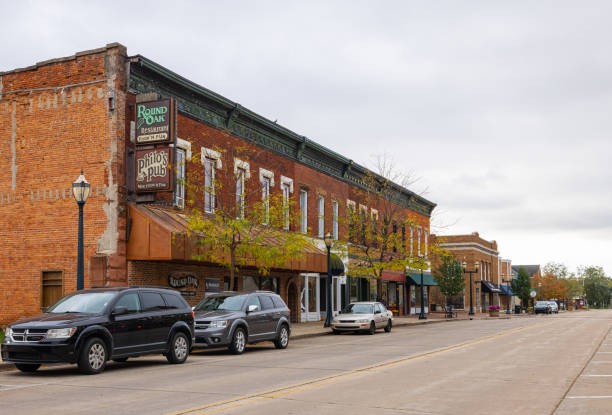

In [27]:
from transformers import pipeline
from PIL import Image
import requests

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/segmentation_input.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [28]:
from transformers import pipeline
semantic_segmentation = pipeline("image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024")
results = semantic_segmentation(image)
results

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/Users/chandra/.local/share/virtualenvs/Notebooks-nyz_tjgx/lib/python3.13/site-packages/transformers/image_processing_base.py:412: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: 'reduce_labels'
  image_processor = cls(**image_processor_dict)
Device set to use mps:0


[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'terrain',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

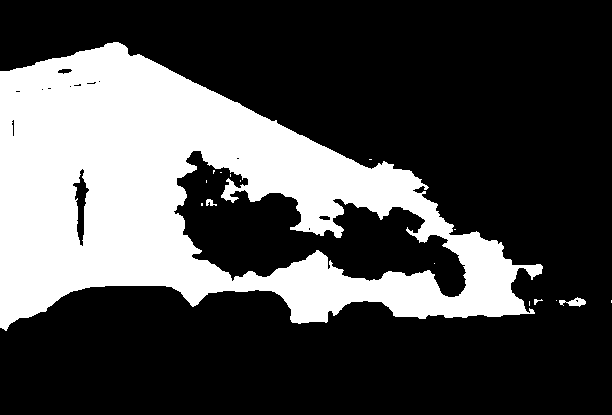

In [30]:
results[2]["mask"]

---

##### Image Classification using Vision Transformers (ViT)

In [ ]:
from datasets import load_dataset
food = load_dataset("food101", split="train[:5000]")

In [ ]:
food[0]

{'image': <PIL.Image.Image image mode=RGB size=384x512>, 'label': 6}

In [ ]:
food = food.train_test_split(test_size=0.2)

In [ ]:
food

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1000
    })
})

In [ ]:
food["train"][32]

{'image': <PIL.Image.Image image mode=RGB size=512x341>, 'label': 81}

In [ ]:
food["train"].features["label"].names[81]


'ramen'

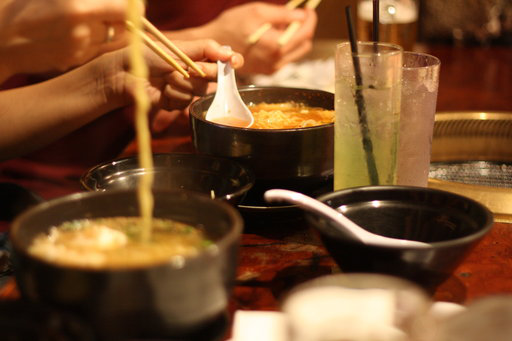

In [ ]:
food["train"][32]["image"]

In [ ]:
labels = food["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [ ]:
food["train"][32]
id2label[str(food["train"][32]["label"])]

'ramen'

In [ ]:
food["train"][2]

In [ ]:
id2label[str(10)]

##### Fine-tuning ViT for custom datasets

In [ ]:
# Preprocess

from transformers import AutoImageProcessor

checkpoint = "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(checkpoint, use_fast=True)
image_processor

ViTImageProcessorFast {
  "crop_size": null,
  "data_format": "channels_first",
  "default_to_square": true,
  "device": null,
  "do_center_crop": null,
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessorFast",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "input_data_format": null,
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "return_tensors": null,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [ ]:
food["train"][0]["image"].size

(287, 512)

In [ ]:
# Apply PyTorch transforms on images

from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor

normalize = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)
size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)
_transforms = Compose([RandomResizedCrop(size), ToTensor(), normalize])

def transforms(examples):
    examples["pixel_values"] = [_transforms(img.convert("RGB")) for img in examples["image"]]
    del examples["image"]
    return examples

food = food.with_transform(transforms)

In [ ]:
food["train"][0]["pixel_values"]

tensor([[[-1.0000, -1.0000, -1.0000,  ..., -0.7176, -0.7020, -0.7020],
         [-1.0000, -1.0000, -1.0000,  ..., -0.7490, -0.7255, -0.7255],
         [-1.0000, -1.0000, -1.0000,  ..., -0.7412, -0.7333, -0.7412],
         ...,
         [-0.4118, -0.3882, -0.6471,  ..., -0.3333,  0.1373, -0.0510],
         [-0.2235, -0.4196, -0.5529,  ..., -0.6078, -0.1922, -0.0745],
         [-0.2000, -0.6471, -0.9686,  ..., -0.1843,  0.0745,  0.3412]],

        [[-1.0000, -1.0000, -1.0000,  ..., -0.7490, -0.7255, -0.7255],
         [-1.0000, -1.0000, -1.0000,  ..., -0.7725, -0.7490, -0.7490],
         [-1.0000, -1.0000, -1.0000,  ..., -0.7647, -0.7569, -0.7569],
         ...,
         [-0.2706, -0.2706, -0.5529,  ..., -0.4196,  0.0510, -0.1294],
         [-0.0902, -0.3098, -0.4745,  ..., -0.7020, -0.2784, -0.1529],
         [-0.0745, -0.5451, -0.8902,  ..., -0.2784, -0.0039,  0.2549]],

        [[-1.0000, -1.0000, -1.0000,  ..., -0.7804, -0.7647, -0.7647],
         [-1.0000, -1.0000, -1.0000,  ..., -0

In [ ]:
# Setup DataCollator for batching images for training

from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

In [ ]:
# Setup model evaluation
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
# Train the model using ```Trainer```
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id,
)

training_args = TrainingArguments(
    output_dir="simple_food_model",
    remove_unused_columns=False,
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=food["train"],
    eval_dataset=food["test"],
    processing_class=image_processor,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TrainOutput(global_step=189, training_loss=2.39629725299815, metrics={'train_runtime': 457.5146, 'train_samples_per_second': 26.229, 'train_steps_per_second': 0.413, 'total_flos': 9.307289843712e+17, 'train_loss': 2.39629725299815, 'epoch': 3.0})

In [ ]:
# Publish your fine-tuned model to huggingface
trainer.push_to_hub()

CommitInfo(commit_url='https://huggingface.co/moonranger/simple_food_model/commit/8522627d8ee88f1d9e76c6f3d500230ab89b2d80', commit_message='End of training', commit_description='', oid='8522627d8ee88f1d9e76c6f3d500230ab89b2d80', pr_url=None, repo_url=RepoUrl('https://huggingface.co/moonranger/simple_food_model', endpoint='https://huggingface.co', repo_type='model', repo_id='moonranger/simple_food_model'), pr_revision=None, pr_num=None)

In [ ]:
# Inferencing
ds = load_dataset("food101", split="validation[:10]")


In [ ]:

image = ds["image"][7]

In [ ]:
ds["label"]

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [ ]:
id2label[str(6)]

'beignets'

In [ ]:
from transformers import pipeline

classifier = pipeline("image-classification", model="simple_food_model")
classifier(image)

Device set to use mps:0


[{'label': 'beignets', 'score': 0.3101658821105957},
 {'label': 'hamburger', 'score': 0.01504746824502945},
 {'label': 'bruschetta', 'score': 0.011577808298170567},
 {'label': 'chicken_wings', 'score': 0.0103331059217453},
 {'label': 'pork_chop', 'score': 0.0093568479642272}]

In [ ]:
from transformers import AutoImageProcessor
from transformers import AutoModelForImageClassification

import torch

image_processor = AutoImageProcessor.from_pretrained("simple_food_model")
inputs = image_processor(image, return_tensors="pt")


model = AutoModelForImageClassification.from_pretrained("simple_food_model")
with torch.no_grad():
    logits = model(**inputs).logits

predicted_label = logits.argmax(-1).item()
model.config.id2label[predicted_label]

'beignets'

---

##### Object Detection using ViT

In [ ]:
pip install -q -U albumentations>=1.4.5 torchmetrics pycocotools

Note: you may need to restart the kernel to use updated packages.


In [37]:
MODEL_NAME = "microsoft/conditional-detr-resnet-50"  # or "facebook/detr-resnet-50"
IMAGE_SIZE = 480

In [38]:
# Load dataset
from datasets import load_dataset

cppe5 = load_dataset("cppe-5")

if "validation" not in cppe5:
    split = cppe5["train"].train_test_split(0.15, seed=1337)
    cppe5["train"] = split["train"]
    cppe5["validation"] = split["test"]

cppe5

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 850
    })
    test: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 29
    })
    validation: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 150
    })
})

In [39]:
cppe5["train"][0]

{'image_id': 366,
 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=500x290>,
 'width': 500,
 'height': 500,
 'objects': {'id': [1932, 1933, 1934],
  'area': [27063, 34200, 32431],
  'bbox': [[29.0, 11.0, 97.0, 279.0],
   [201.0, 1.0, 120.0, 285.0],
   [382.0, 0.0, 113.0, 287.0]],
  'category': [0, 0, 0]}}

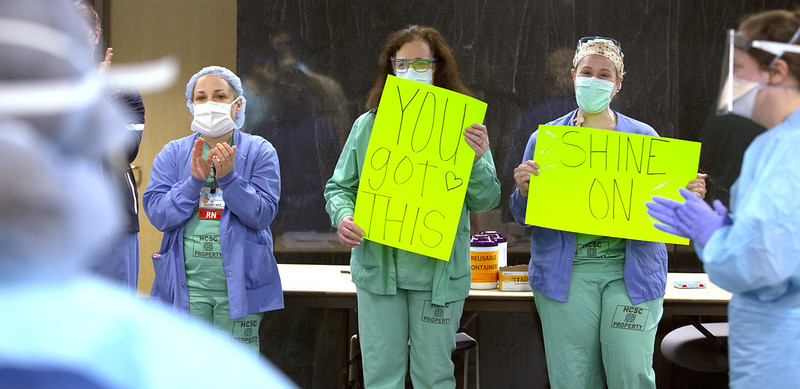

In [40]:
cppe5["train"][2]["image"]

In [49]:
c = cppe5["train"].features["objects"]["category"]
print(c.feature.names)

['Coverall', 'Face_Shield', 'Gloves', 'Goggles', 'Mask']


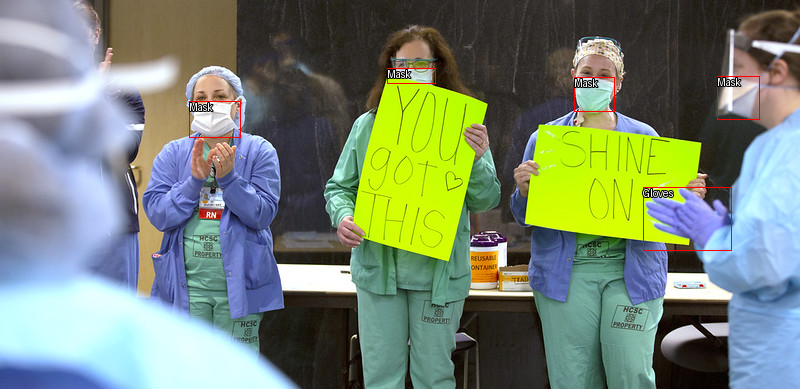

In [50]:
import numpy as np
import os
from PIL import Image, ImageDraw

image = cppe5["train"][2]["image"]
annotations = cppe5["train"][2]["objects"]
draw = ImageDraw.Draw(image)

categories = cppe5["train"].features["objects"]["category"].feature.names

id2label = {index: x for index, x in enumerate(categories, start=0)}
label2id = {v: k for k, v in id2label.items()}

for i in range(len(annotations["id"])):
    box = annotations["bbox"][i]
    class_idx = annotations["category"][i]
    x, y, w, h = tuple(box)
    # Check if coordinates are normalized or not
    if max(box) > 1.0:
        # Coordinates are un-normalized, no need to re-scale them
        x1, y1 = int(x), int(y)
        x2, y2 = int(x + w), int(y + h)
    else:
        # Coordinates are normalized, re-scale them
        x1 = int(x * width)
        y1 = int(y * height)
        x2 = int((x + w) * width)
        y2 = int((y + h) * height)
    draw.rectangle((x, y, x + w, y + h), outline="red", width=1)
    draw.text((x, y), id2label[class_idx], fill="white", stroke_width=1, stroke_fill="black")

image

#### Using Image-To-Image pipeline to enhance images using ViT

In [32]:
from transformers import pipeline
import torch
from accelerate.test_utils.testing import get_backend
# automatically detects the underlying device type (CUDA, CPU, XPU, MPS, etc.)
device, _, _ = get_backend()
#pipe = pipeline(task="image-to-image", model="caidas/swin2SR-lightweight-x2-64", device=device)
pipe = pipeline(task="image-to-image")
pipe

No model was supplied, defaulted to caidas/swin2SR-classical-sr-x2-64 and revision cee1c92 (https://huggingface.co/caidas/swin2SR-classical-sr-x2-64).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/48.5M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/152 [00:00<?, ?B/s]

Device set to use mps:0


(532, 432)


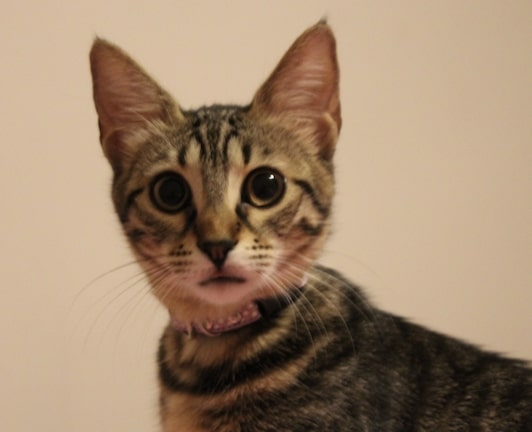

In [33]:
from PIL import Image
import requests

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/cat.jpg"
image = Image.open(requests.get(url, stream=True).raw)

print(image.size)
image

(1072, 880)


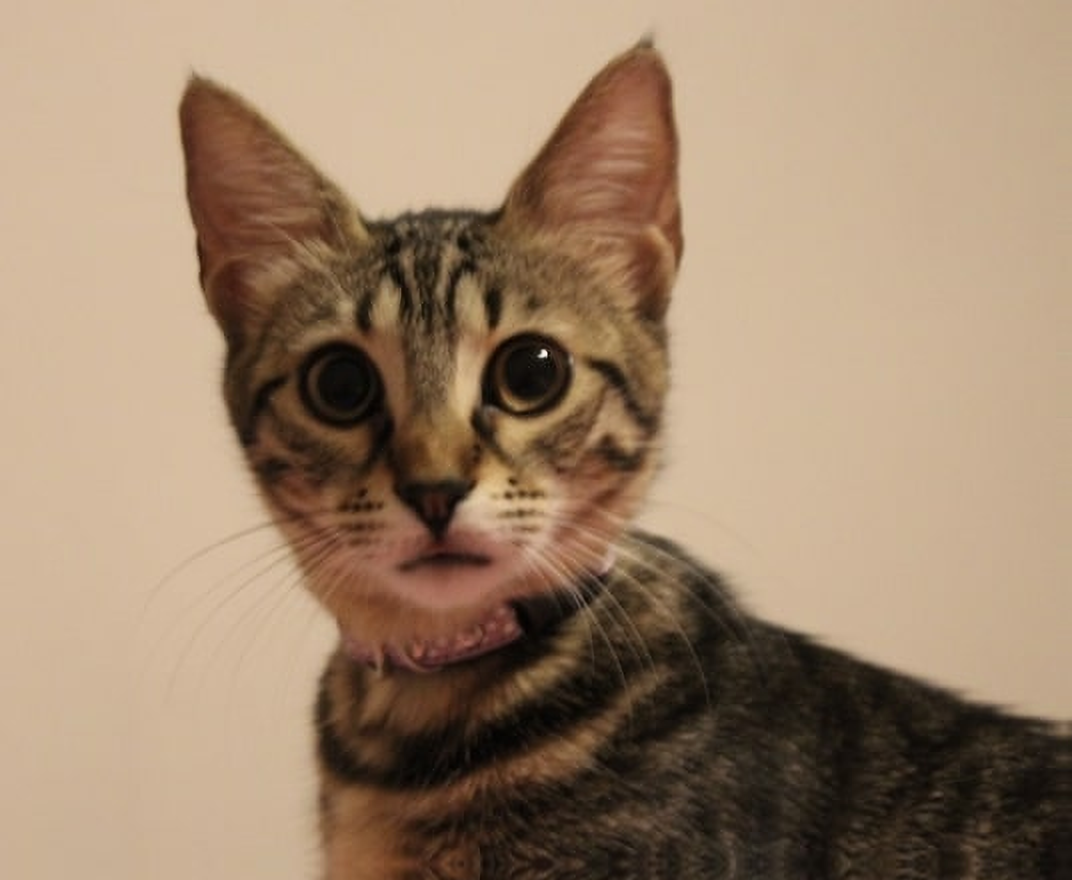

In [34]:
upscaled = pipe(image)
print(upscaled.size)
upscaled

(2160, 1776)


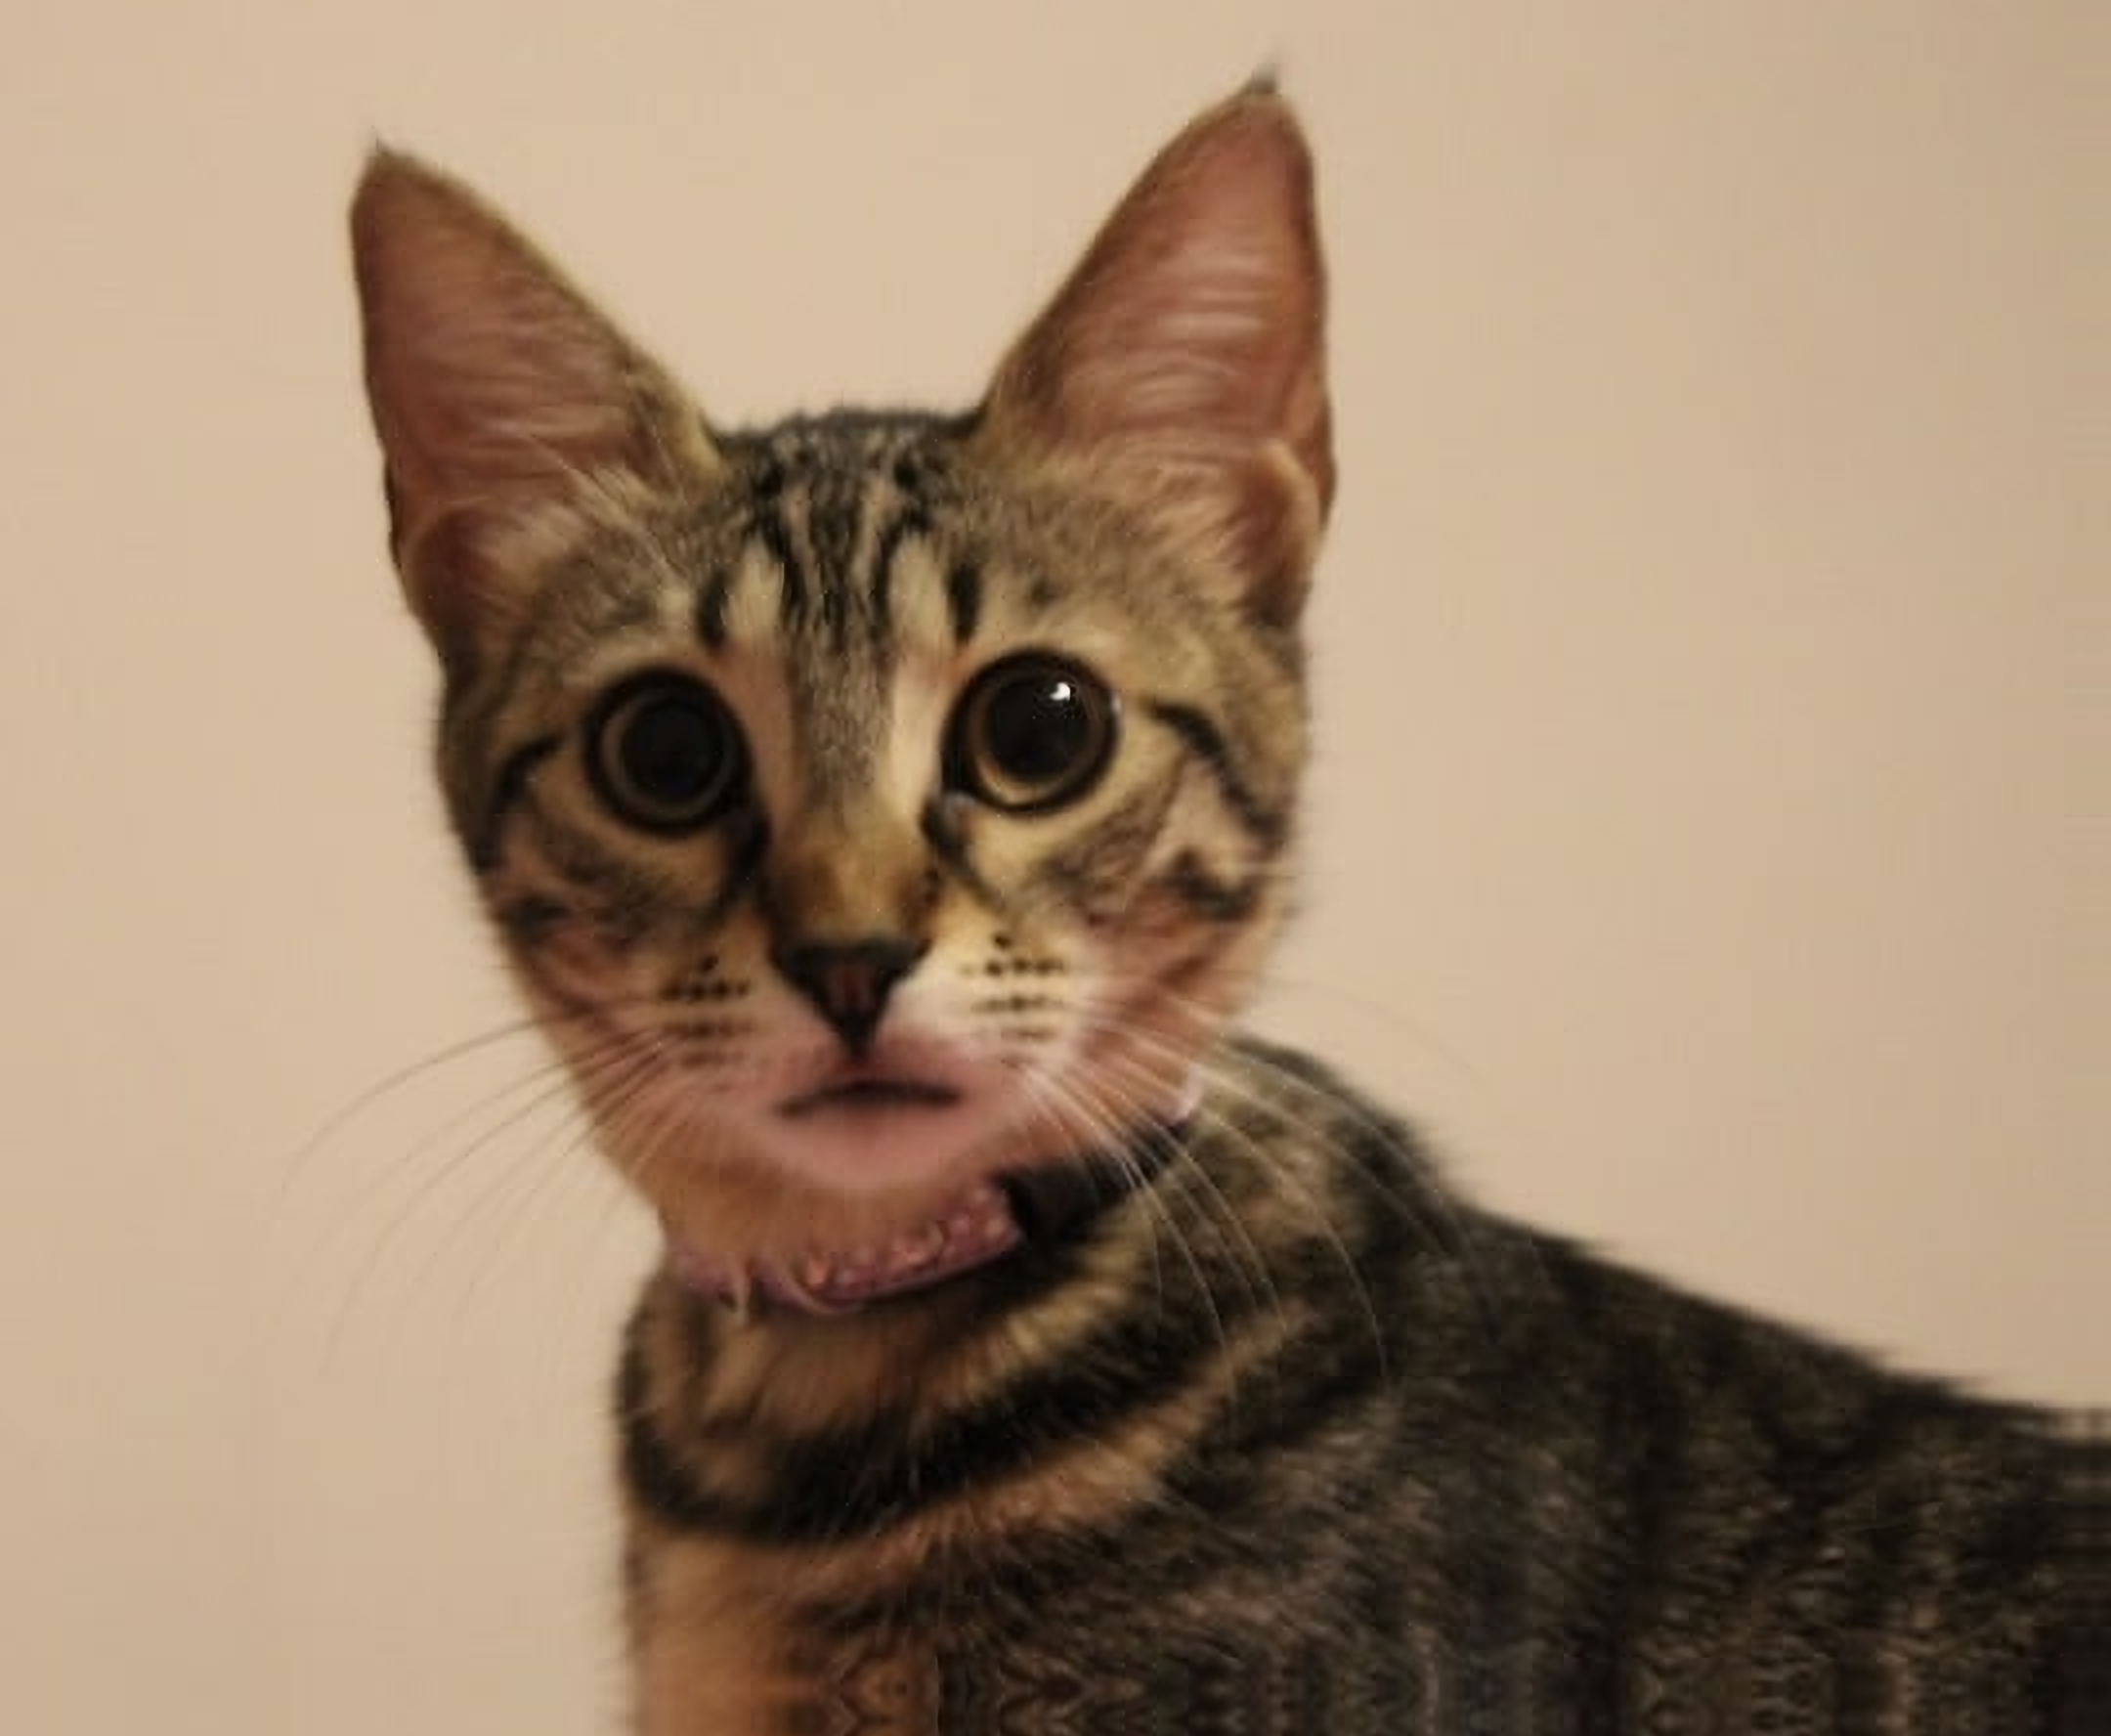

In [35]:
upscaled = pipe(upscaled)
print(upscaled.size)
upscaled

---

#### Other Alternatives to interact with LLMs (that require no signup)

In [ ]:
pip install openai

##### Using LLM7.io

LLM7.io provides free anonymous access to various LLMs as a service. 

It allows interaction with LLMs using OpenAI python library. 

While it is free to use, there are rate limits (around 40 requests per minute).

In [ ]:
pip install openai

  Using cached openai-1.82.0-py3-none-any.whl.metadata (25 kB)
  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jiter-0.10.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
Using cached openai-1.82.0-py3-none-any.whl (720 kB)
Using cached anyio-4.9.0-py3-none-any.whl (100 kB)
Using cached distro-1.9.0-py3-none-any.whl (20 kB)
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
Using cached httpcore-1.0.9-py3-none-any.whl (78 kB)
Using cached jiter-0.10.0-cp312-cp312-macosx_11_0_arm64.whl (320 kB)
Using cached h11-0.16.0-py3-none-any.whl (37 kB)
Using cached sniffio-1.3.1-py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [op

In [ ]:
from openai import OpenAI

client = OpenAI(base_url="https://api.llm7.io/v1", api_key="unused")

response = client.chat.completions.create(
    model="gpt-4.1-nano", 
    messages=[
        {"role": "user", "content": "Generate a python function to check if a number is prime."}
    ]
)

print(response.choices[0].message.content)

Certainly! Here's a straightforward Python function that checks whether a number is prime. It uses a common optimization: checking divisibility only up to the square root of the number, since a larger factor would have a corresponding smaller partner that we've already tested.

```python
import math

def is_prime(n):
    if n <= 1:
        return False  # 0 and 1 are not prime
    if n <= 3:
        return True   # 2 and 3 are prime
    if n % 2 == 0 or n % 3 == 0:
        return False  # eliminate multiples of 2 and 3 early

    # Check divisors up to sqrt(n)
    for i in range(5, int(math.sqrt(n)) + 1, 6):
        if n % i == 0 or n % (i + 2) == 0:
            return False
    return True
```

This function efficiently tests primality for a wide range of numbers. Want me to tweak it or add some explanations?


##### TorchScript for Deployment
TorchScript creates a serializable and optimizable model representation that can run in non-Python environments. It's ideal for production due to its high performance.



In [51]:
import torch
import torch.nn as nn

# Define a simple model for demonstration
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(10, 1)

    def forward(self, x):
        return self.linear(x)

model = SimpleModel()
model.eval() # Set the model to evaluation mode
model

SimpleModel(
  (linear): Linear(in_features=10, out_features=1, bias=True)
)

In [52]:

# Tracing approach (for models with fixed shapes)
example_input = torch.rand(1, 10)
traced_model = torch.jit.trace(model, example_input)
traced_model.save("traced_model.pt")


In [53]:

# Scripting approach (handles control flow)
scripted_model = torch.jit.script(model)
scripted_model.save("scripted_model.pt")


In [54]:

# Loading for inference
loaded_model = torch.jit.load("traced_model.pt")
input_tensor = torch.rand(1, 10)
with torch.inference_mode():
    output = loaded_model(input_tensor)
print("Output from traced model:", output)

Output from traced model: tensor([[0.9933]])


In [56]:

# Loading for inference
loaded_model = torch.jit.load("scripted_model.pt")
input_tensor = torch.rand(1, 10)
with torch.inference_mode():
    output = loaded_model(input_tensor)
print("Output from scripted model:", output)

Output from scripted model: tensor([[0.8852]])


In [57]:
loaded_model

RecursiveScriptModule(
  original_name=SimpleModel
  (linear): RecursiveScriptModule(original_name=Linear)
)

**Note**: Always verify that the output of the TorchScript model matches the original model's output. Tracing is generally faster but less flexible than scripting.

-----

#### ONNX Export

ONNX (Open Neural Network Exchange) provides a way to represent deep learning models in a common format. This allows for interoperability between different frameworks and deployment to various runtimes like ONNX Runtime, TensorRT, or CoreML.

[cite\_start]**ONNX Export Example** [cite: 1]

In [59]:
pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 11.6 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [onnx]1/2 [onnx]
Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install onnxscript onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 667.4/667.4 kB 9.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 11.6 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.8/663.8 kB 9.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [onnxruntime] [onnxruntime]
Note: you may need to restart the kernel to use updated packages.


In [66]:
import torch
import torchvision
import onnx
# Load a pre-trained model
model = torchvision.models.mobilenet_v3_small(weights="DEFAULT").eval()

# Create a dummy input for tracing
dummy_input = torch.randn(1, 3, 224, 224)

# Export the model to ONNX format
torch.onnx.export(
    model,
    dummy_input,
    "mobilenet_v3_small.onnx",
    opset_version=17,
    input_names=["input"],
    output_names=["output"],
    dynamic_axes={
        "input": {0: "batch_size"},
        "output": {0: "batch_size"}
    }, dynamo=True
)

/var/folders/8r/bd41h17j3g733j4twtb7rh9c0000gn/T/ipykernel_5148/30147351.py:11: UserWarning: # 'dynamic_axes' is not recommended when dynamo=True, and may lead to 'torch._dynamo.exc.UserError: Constraints violated.' Supply the 'dynamic_shapes' argument instead if export is unsuccessful.
  torch.onnx.export(


[torch.onnx] Obtain model graph for `MobileNetV3([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `MobileNetV3([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ❌


ConversionError: Failed to convert the exported program to an ONNX model. [96mThis is step 3/3[0m of exporting the model to ONNX. Next steps:
- If there is a missing ONNX function, implement it and register it to the registry.
- If there is an internal error during ONNX conversion, debug the error and summit a PR to PyTorch.
- Create an error report with `torch.onnx.export(..., report=True)`, and save the ExportedProgram as a pt2 file. Create an issue in the PyTorch GitHub repository against the [96m*onnx*[0m component. Attach the error report and the pt2 model.

## Exception summary

<class 'torch.onnx._internal.exporter._errors.DispatchError'>: No ONNX function found for <OpOverload(op='aten.sym_size', overload='int')>. Failure message: No decompositions registered for the real-valued input
⬆️
<class 'torch.onnx._internal.exporter._errors.ConversionError'>: Error when translating node %sym_size_int_1 : [num_users=157] = call_function[target=torch.ops.aten.sym_size.int](args = (%x, 0), kwargs = {}). See the stack trace for more information.

(Refer to the full stack trace above for more information.)

[cite\_start]**ONNX Runtime Inference** [cite: 1]

In [ ]:
import onnxruntime as ort
import numpy as np

# Create an inference session
session = ort.InferenceSession(
    "mobilenet_v3_small.onnx",
    providers=['CUDAExecutionProvider', 'CPUExecutionProvider']
)

# Prepare the input for ONNX Runtime
input_name = session.get_inputs()[0].name
ort_inputs = {input_name: dummy_input.numpy()}

# Run inference
output_name = session.get_outputs()[0].name
ort_outputs = session.run([output_name], ort_inputs)

# Compare with the original PyTorch model's output
torch_out = model(dummy_input).detach().numpy()
np.testing.assert_allclose(ort_outputs[0], torch_out, rtol=1e-3, atol=1e-5)
print("ONNX Runtime output is close to the PyTorch output.")

-----

#### Model Quantization

Quantization reduces the precision of model weights and activations, often from 32-bit floating-point to 8-bit integers. This results in smaller model sizes and faster inference.

[cite\_start]**Post-Training Static Quantization** [cite: 1]

In [ ]:
import torch
from torch.quantization import get_default_qconfig, prepare_fx, convert_fx

# Assuming 'model' is your trained model
model.eval()

# 1. Define Quantization Configuration
qconfig = get_default_qconfig('fbgemm')
qconfig_mapping = {"": qconfig}

# 2. Prepare the model for quantization
model_prepared = prepare_fx(model, qconfig_mapping)

# 3. Calibrate the model with representative data
# In a real scenario, you would use a calibration_loader with actual data
with torch.inference_mode():
    for _ in range(10):
        calibration_data = torch.randn(1, 3, 224, 224)
        model_prepared(calibration_data)

# 4. Convert to a quantized model
quantized_model = convert_fx(model_prepared)

# You can now save and use the quantized_model for inference
# torch.save(quantized_model.state_dict(), "quantized_model.pth")

-----

#### Serving with FastAPI

FastAPI is a modern, fast web framework for building APIs with Python. It's a great choice for serving PyTorch models in production.

[cite\_start]**FastAPI Implementation** [cite: 1]

In [ ]:
# Save this as a separate python file, e.g., 'main.py'
# and run with `uvicorn main:app --reload`
from fastapi import FastAPI, UploadFile, File
from PIL import Image
import io
import torch
import torchvision.transforms as T

app = FastAPI()

# Load the TorchScript model at startup
model = torch.jit.load("traced_model.pt")
model.eval()

# Preprocessing pipeline
transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    contents = await file.read()
    image = Image.open(io.BytesIO(contents)).convert("RGB")
    tensor = transform(image).unsqueeze(0)

    with torch.inference_mode():
        output = model(tensor)

    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    top5_prob, top5_indices = torch.topk(probabilities, 5)

    return {
        "predictions": [
            {"class_id": idx.item(), "probability": prob.item()}
            for idx, prob in zip(top5_indices, top5_prob)
        ]
    }

@app.get("/health")
async def health():
    return {"status": "healthy"}